In [1]:
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm

In [2]:
all_file = glob.glob('../../data/processed/WESAD/feature_extracted/S*.csv')
df_all = pd.concat([pd.read_csv(file) for file in all_file], ignore_index=True, axis=0)
df_all.head()

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8
1,39.252000,-47.664667,7.822000,62.549339,0.544205,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8
2,39.628667,-46.246667,9.764000,62.469299,1.120992,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8
3,38.927333,-48.439333,6.083333,62.442314,0.428267,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8


In [3]:
df_all['focus_label'] = -1

In [4]:
df_all

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8,-1
1,39.252000,-47.664667,7.822000,62.549339,0.544205,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8,-1
2,39.628667,-46.246667,9.764000,62.469299,1.120992,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8,-1
3,38.927333,-48.439333,6.083333,62.442314,0.428267,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8,-1
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,46.964000,-8.760000,-7.498667,63.226677,2.985640,1.290620,0.053588,0.000966,23.230088,1.451065,81.961468,774.259868,238.947514,170.587935,70.270270,4.036088,2,15,-1
1071,33.698667,3.725333,49.853333,62.980308,2.770939,1.290599,0.020151,-0.000114,25.608455,2.211387,101.350382,641.304348,252.891267,181.866120,88.888889,1.921900,2,15,-1
1072,31.114000,4.294000,52.504667,62.972961,2.406421,1.332025,0.031676,0.000495,24.847170,1.932891,90.927874,699.776786,207.303412,159.144898,68.292683,1.107406,2,15,-1
1073,28.826667,-17.737333,17.747333,63.635677,6.112821,1.373313,0.023374,0.000278,24.011434,1.701185,98.456919,655.539773,282.197210,195.836075,74.418605,15.788516,2,15,-1


In [5]:
def quest_load(subject_id):
    subject_path = f'../../data/raw/WESAD/S{subject_id}/S{subject_id}_quest.csv'

    with open(subject_path, 'r') as f:
        lines = f.readlines()

    order_line = [l for l in lines if l.startswith('# ORDER')][0]
    order = order_line.strip().split(';')[1:-1]
    order = [o.strip().lower() for o in order if o.strip() not in ['bread','fread','sread']]

    stai_dict = {}
    valence_dict = {}
    arousal_dict = {}

    stai_lines = [l for l in lines if l.startswith('# STAI')]
    dim_lines = [l for l in lines if l.startswith('# DIM')]

    stai_score = np.array([[int(i) for i in l.strip().split(';')[1:-1] if i.strip().isdigit()] for l in stai_lines])
    dim_score = np.array([[int(i) for i in l.strip().split(';')[1:-1] if i.strip().isdigit()] for l in dim_lines])

    # DIM score
    valence_score = dim_score[:, 0]
    arousal_score = dim_score[:, 1]

    min_len = min(len(order), len(valence_score))

    valence_score = valence_score[:min_len]
    arousal_score = arousal_score[:min_len]

    # STAI score
    for i, task in enumerate(order[:min_len]):
        if task.startswith('medi'):
            task_key = 'meditation'
        else:
            task_key = task

        positives = (stai_score[:, 0] + stai_score[:, 3] + stai_score[:, 5]) / 3
        negatives = (stai_score[:, 1] + stai_score[:, 2] + stai_score[:, 4]) / 3

        scored_stai = negatives[i] - positives[i]

        valence_dict[task_key] = valence_score[i]
        arousal_dict[task_key] = arousal_score[i]
        stai_dict[task_key] = scored_stai

    return{
        'valence': valence_dict,
        'arousal': arousal_dict,
        'stai': stai_dict
    }

In [6]:
quest_dict = {}
for s in df_all['subject'].unique():
    quest_dict[s] = quest_load(s)

In [7]:
quest_dict

{8: {'valence': {'base': 7, 'fun': 7, 'meditation': 6, 'tsst': 5},
  'arousal': {'base': 3, 'fun': 3, 'meditation': 4, 'tsst': 7},
  'stai': {'base': -0.6666666666666667,
   'fun': -0.6666666666666667,
   'meditation': -1.0000000000000002,
   'tsst': 0.9999999999999998}},
 9: {'valence': {'base': 8, 'tsst': 7, 'meditation': 9, 'fun': 7},
  'arousal': {'base': 3, 'tsst': 4, 'meditation': 1, 'fun': 3},
  'stai': {'base': -2.0,
   'tsst': -0.33333333333333326,
   'meditation': -2.6666666666666665,
   'fun': -1.6666666666666665}},
 4: {'valence': {'base': 7, 'fun': 8, 'meditation': 5, 'tsst': 5},
  'arousal': {'base': 2, 'fun': 1, 'meditation': 2, 'tsst': 7},
  'stai': {'base': -2.0,
   'fun': -2.3333333333333335,
   'meditation': -0.6666666666666667,
   'tsst': 0.6666666666666667}},
 11: {'valence': {'base': 6, 'tsst': 4, 'meditation': 6, 'fun': 8},
  'arousal': {'base': 2, 'tsst': 6, 'meditation': 2, 'fun': 3},
  'stai': {'base': -2.0,
   'tsst': 1.3333333333333335,
   'meditation': -2.3

In [8]:
label_to_task = {
    1: 'base',
    2: 'tsst',
    3: 'fun',
    4: 'meditation'
}

In [9]:
def refined_label(lbl, dim_arousal, dim_valence, stai_score):
    if lbl in [1, 4]:
        if (dim_arousal <= 3) and (dim_valence >= 5):
            return 1
        else:
            return 0
        
    elif lbl == 2:
        if stai_score <= 0:
            if dim_arousal >= 5:
                return 1
            else:
                return 0
        else:
            return 0
        
    else:
        return 0

In [10]:
for i, row in tqdm(df_all.iterrows(), total=len(df_all)):
    subj = int(row['subject'])
    lbl = int(row['label'])

    if lbl not in label_to_task:
        continue

    task_name = label_to_task[lbl]
    quest = quest_dict[subj]

    # ดึงคะแนนที่ต้องใช้
    dim_arousal = quest['arousal'][task_name]
    dim_valence = quest['valence'][task_name]
    stai_score = quest['stai'][task_name] if lbl == 2 else None

    # คำนวณ label
    focus = refined_label(lbl, dim_arousal, dim_valence, stai_score)

    # บันทึกลง dataframe
    df_all.at[i, 'focus_label'] = focus

100%|██████████| 1075/1075 [00:00<00:00, 26789.28it/s]


In [11]:
df_all

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8,1
1,39.252000,-47.664667,7.822000,62.549339,0.544205,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8,1
2,39.628667,-46.246667,9.764000,62.469299,1.120992,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8,1
3,38.927333,-48.439333,6.083333,62.442314,0.428267,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8,1
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,46.964000,-8.760000,-7.498667,63.226677,2.985640,1.290620,0.053588,0.000966,23.230088,1.451065,81.961468,774.259868,238.947514,170.587935,70.270270,4.036088,2,15,0
1071,33.698667,3.725333,49.853333,62.980308,2.770939,1.290599,0.020151,-0.000114,25.608455,2.211387,101.350382,641.304348,252.891267,181.866120,88.888889,1.921900,2,15,0
1072,31.114000,4.294000,52.504667,62.972961,2.406421,1.332025,0.031676,0.000495,24.847170,1.932891,90.927874,699.776786,207.303412,159.144898,68.292683,1.107406,2,15,0
1073,28.826667,-17.737333,17.747333,63.635677,6.112821,1.373313,0.023374,0.000278,24.011434,1.701185,98.456919,655.539773,282.197210,195.836075,74.418605,15.788516,2,15,0


In [12]:
df_all.value_counts('focus_label')

focus_label
1    595
0    480
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
palette = {0: "#708090", 1: "#6A0DAD"}

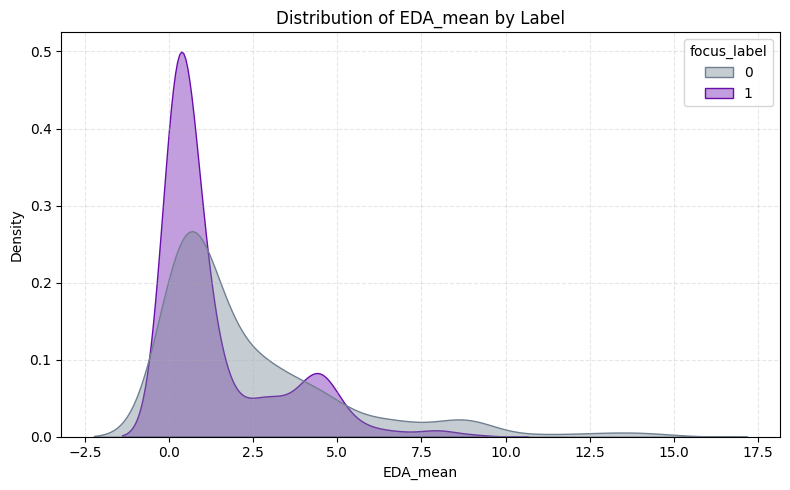

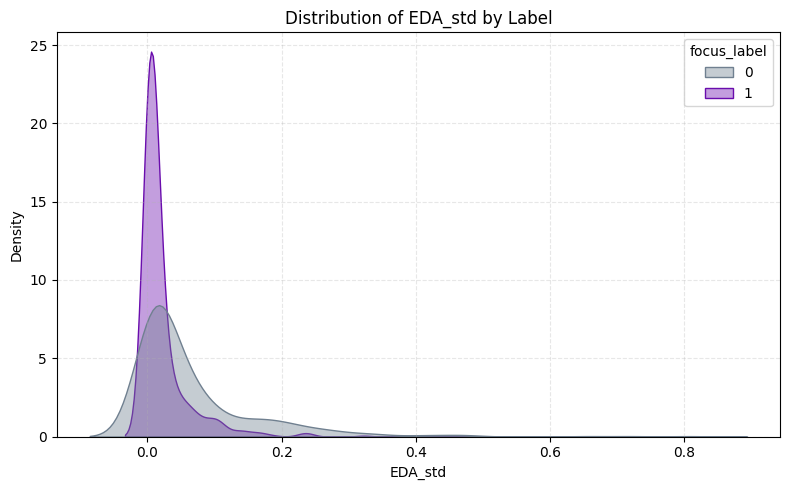

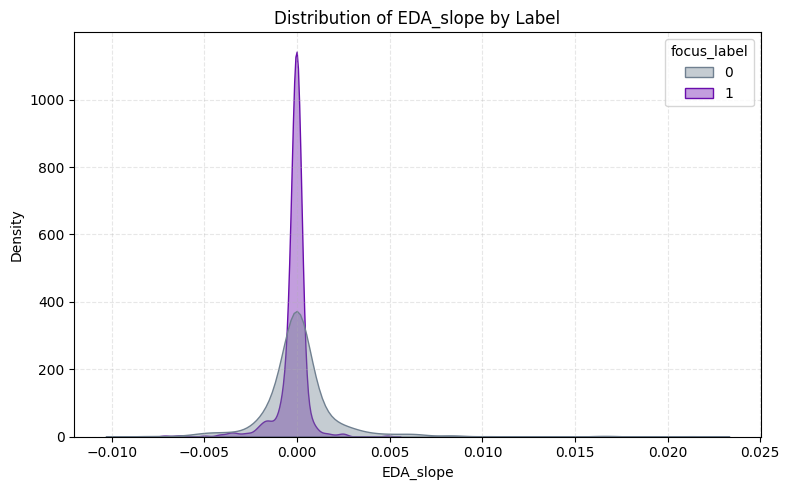

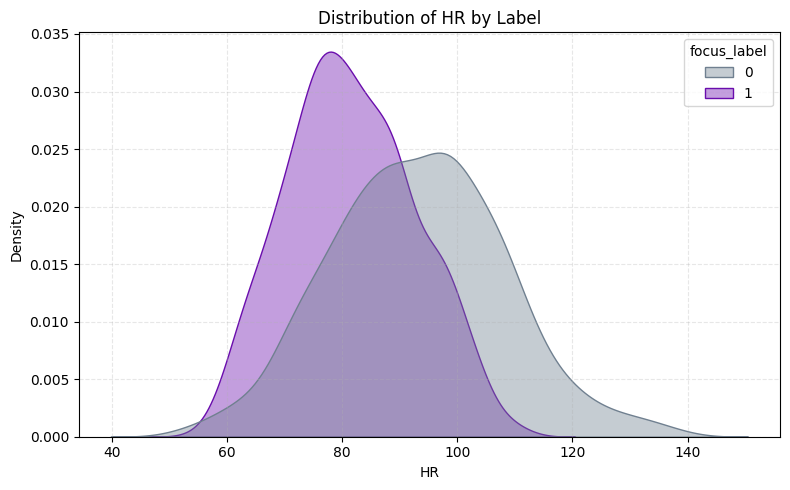

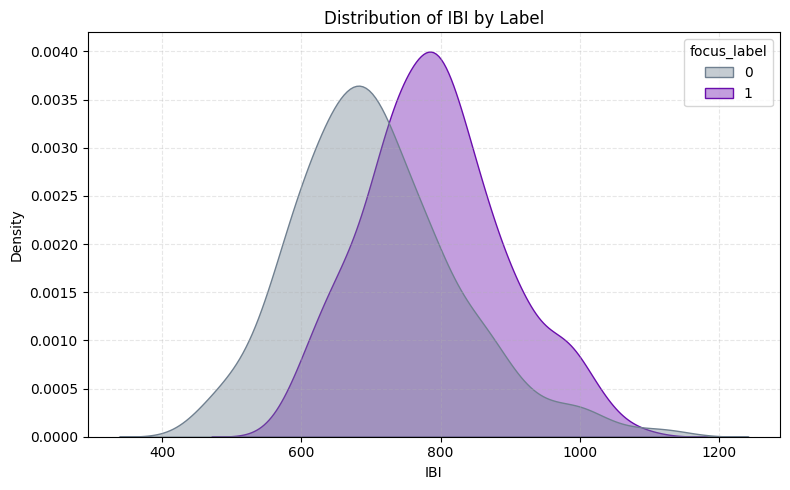

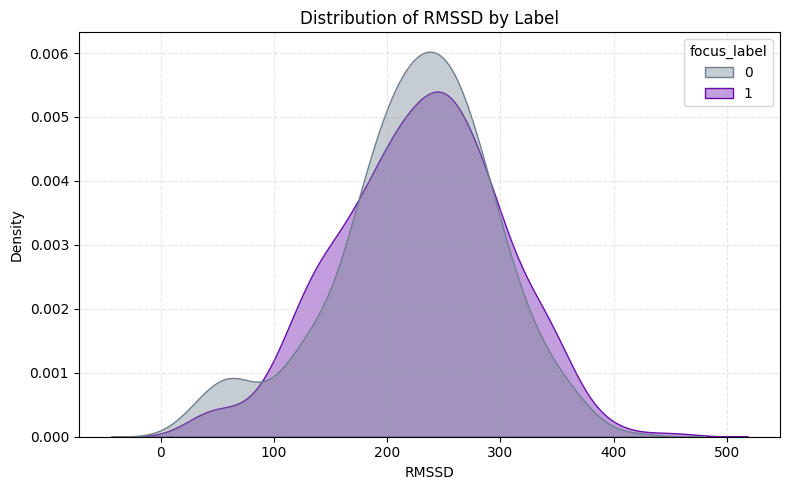

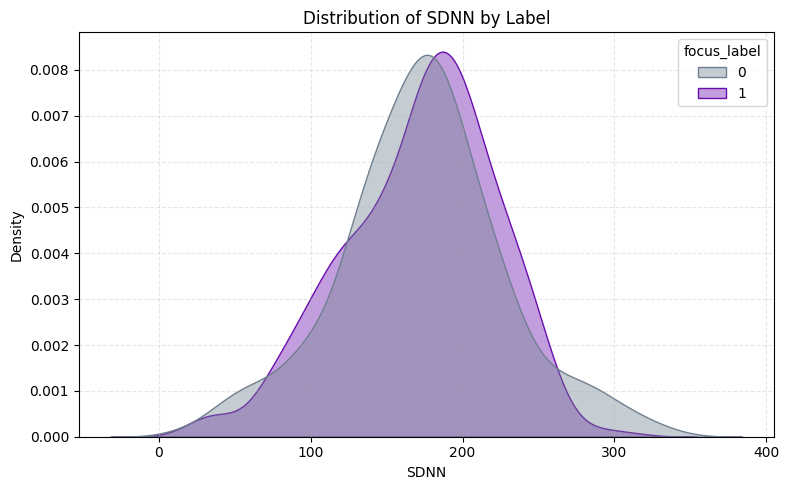

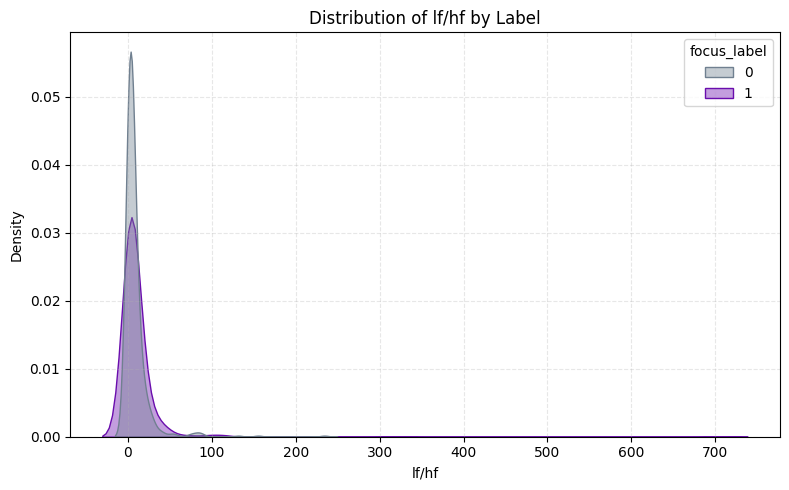

In [15]:
for feature in ['EDA_mean', 'EDA_std', 'EDA_slope','HR', 'IBI', 'RMSSD', 'SDNN', 'lf/hf']:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df_all, x=feature, hue='focus_label',
                common_norm=False, palette=palette, fill=True, alpha=0.4)
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [16]:
df_all

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8,1
1,39.252000,-47.664667,7.822000,62.549339,0.544205,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8,1
2,39.628667,-46.246667,9.764000,62.469299,1.120992,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8,1
3,38.927333,-48.439333,6.083333,62.442314,0.428267,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8,1
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,46.964000,-8.760000,-7.498667,63.226677,2.985640,1.290620,0.053588,0.000966,23.230088,1.451065,81.961468,774.259868,238.947514,170.587935,70.270270,4.036088,2,15,0
1071,33.698667,3.725333,49.853333,62.980308,2.770939,1.290599,0.020151,-0.000114,25.608455,2.211387,101.350382,641.304348,252.891267,181.866120,88.888889,1.921900,2,15,0
1072,31.114000,4.294000,52.504667,62.972961,2.406421,1.332025,0.031676,0.000495,24.847170,1.932891,90.927874,699.776786,207.303412,159.144898,68.292683,1.107406,2,15,0
1073,28.826667,-17.737333,17.747333,63.635677,6.112821,1.373313,0.023374,0.000278,24.011434,1.701185,98.456919,655.539773,282.197210,195.836075,74.418605,15.788516,2,15,0


In [17]:
df_all.to_csv('WESAD_with_focus.csv')